## Importing Libraries

In [ ]:
import cv2
from google.colab import files
import pandas as pd
from google.colab.patches import cv2_imshow
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt

## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Reading an image from drive

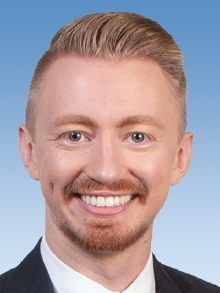

In [ ]:
img = cv2.imread("/content/drive/MyDrive/BDA/Open eyes/open1.png")
cv2_imshow(img)

## Function for detecting face and eye state 

In [ ]:
def detectAndDisplay(frame):
  face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/BDA/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/BDA/haarcascade_eye_tree_eyeglasses.xml')    
  frame = cv2.resize(frame, (300,300))
  frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  frame_gray = cv2.equalizeHist(frame_gray)
  #-- Detect faces
  faces = face_cascade.detectMultiScale(frame_gray)
  for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
    faceROI = frame_gray[y:y+h,x:x+w]
    #-- In each face, detect eyes
    eyes = eye_cascade.detectMultiScale(faceROI)
    if type(eyes) is tuple:
      print("Eyes closed")
    else:
      print("Eyes open")
    for (x2,y2,w2,h2) in eyes:
      eye_center = (x + x2 + w2//2, y + y2 + h2//2)
      radius = int(round((w2 + h2)*0.25))
      frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
  cv2_imshow(frame)

Eyes open


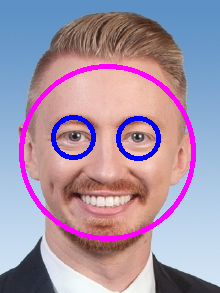

In [ ]:
detectAndDisplay(img)

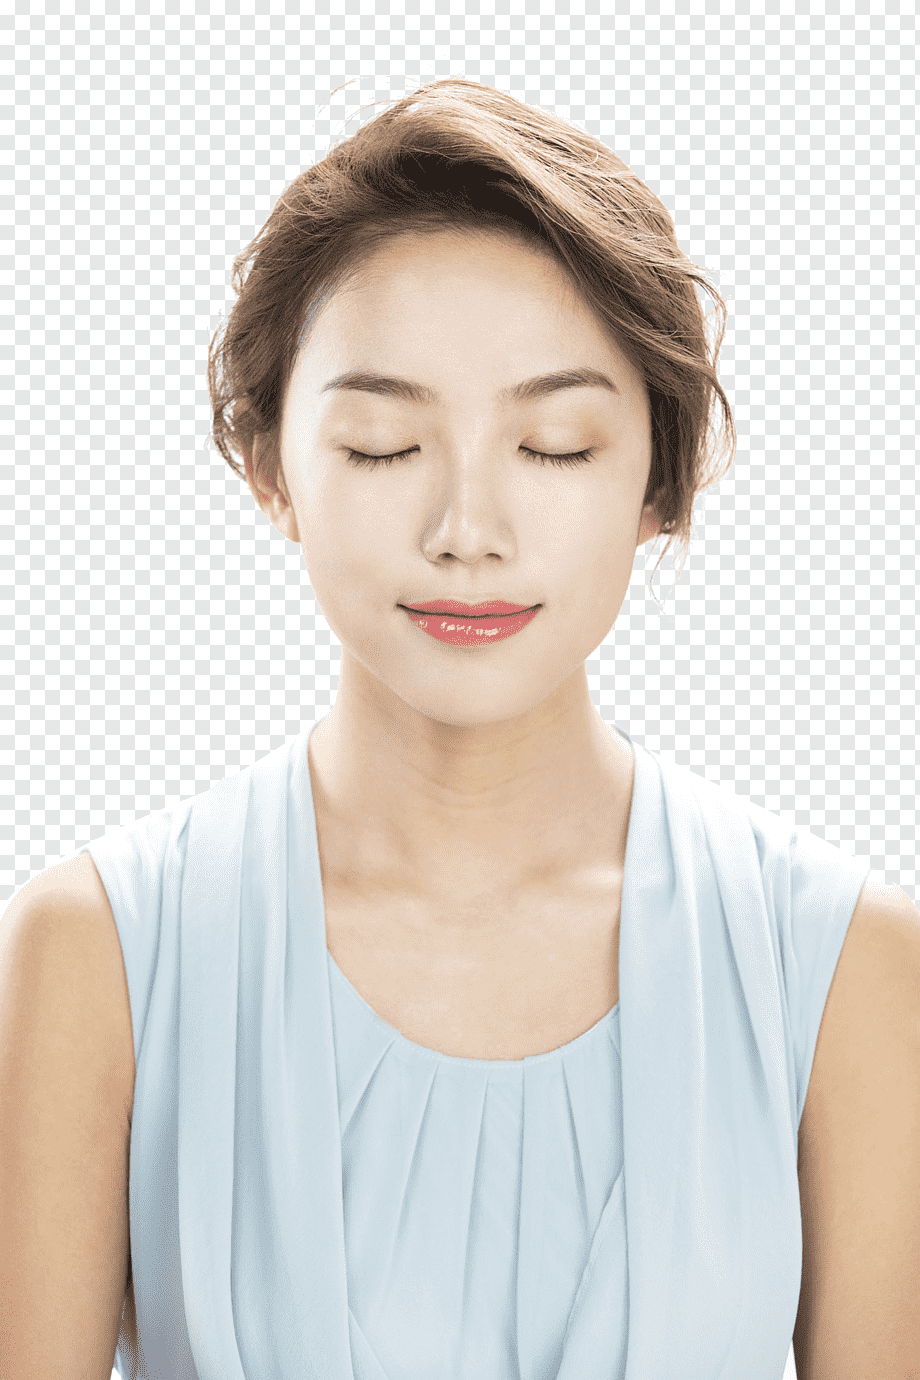

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/BDA/Closed Eyes/close6.png")
cv2_imshow(img2)

Eyes closed


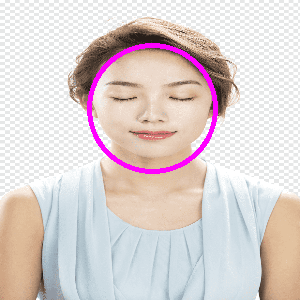

In [ ]:
detectAndDisplay(img2)

## Creating a dataframe

In [ ]:
# importing data
data = pd.read_excel("/content/drive/MyDrive/BDA/Closed Eyes/Images.xlsx", header=0)
data.head()

Image Path Actual state
0  /content/drive/MyDrive/BDA/Closed Eyes/close1.jpg  Closed eyes
1  /content/drive/MyDrive/BDA/Closed Eyes/close10...  Closed eyes
2  /content/drive/MyDrive/BDA/Closed Eyes/close11...  Closed eyes
3  /content/drive/MyDrive/BDA/Closed Eyes/close12...  Closed eyes
4  /content/drive/MyDrive/BDA/Closed Eyes/close13...  Closed eyes

In [ ]:
data.describe()

Image Path Actual state
count                                               45           45
unique                                              45            2
top     /content/drive/MyDrive/BDA/Open eyes/open1.png    Open eyes
freq                                                 1           24

In [ ]:
Path = data['Image Path']
State = data['Actual state']

In [ ]:
dataf = pd.DataFrame.from_dict(Path)
dataf.head()

Image Path
0  /content/drive/MyDrive/BDA/Closed Eyes/close1.jpg
1  /content/drive/MyDrive/BDA/Closed Eyes/close10...
2  /content/drive/MyDrive/BDA/Closed Eyes/close11...
3  /content/drive/MyDrive/BDA/Closed Eyes/close12...
4  /content/drive/MyDrive/BDA/Closed Eyes/close13...

In [ ]:
dataf['State'] = State
dataf.tail()

Image Path      State
40   /content/drive/MyDrive/BDA/Open eyes/open5.jpg  Open eyes
41   /content/drive/MyDrive/BDA/Open eyes/open6.jpg  Open eyes
42  /content/drive/MyDrive/BDA/Open eyes/open7.webp  Open eyes
43   /content/drive/MyDrive/BDA/Open eyes/open8.jpg  Open eyes
44   /content/drive/MyDrive/BDA/Open eyes/open9.jpg  Open eyes

## Function for returning eyes state

In [ ]:
def detect(frame):
  face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/BDA/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/BDA/haarcascade_eye_tree_eyeglasses.xml') 
  frame = cv2.resize(frame, (300,300))
  frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  frame_gray = cv2.equalizeHist(frame_gray)
  #-- Detect faces
  faces = face_cascade.detectMultiScale(frame_gray)
  for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
    faceROI = frame_gray[y:y+h,x:x+w]
    #-- In each face, detect eyes
    eyes = eye_cascade.detectMultiScale(faceROI)
    if type(eyes) is tuple:
      return 'Closed eyes'
    else:
      return 'Open eyes'

In [ ]:
test1 = dataf['Image Path'].iloc[0]
print(test1)
print(detect(cv2.imread(test1)))

/content/drive/MyDrive/BDA/Closed Eyes/close1.jpg
Closed eyes


## Assigning predicted state

In [ ]:
pol = lambda x: detect(cv2.imread(x))
dataf['Predicted_State'] = dataf['Image Path'].apply(pol)
dataf

Image Path  ... Predicted_State
0   /content/drive/MyDrive/BDA/Closed Eyes/close1.jpg  ...     Closed eyes
1   /content/drive/MyDrive/BDA/Closed Eyes/close10...  ...     Closed eyes
2   /content/drive/MyDrive/BDA/Closed Eyes/close11...  ...     Closed eyes
3   /content/drive/MyDrive/BDA/Closed Eyes/close12...  ...     Closed eyes
4   /content/drive/MyDrive/BDA/Closed Eyes/close13...  ...     Closed eyes
5   /content/drive/MyDrive/BDA/Closed Eyes/close14...  ...       Open eyes
6   /content/drive/MyDrive/BDA/Closed Eyes/close15...  ...       Open eyes
7   /content/drive/MyDrive/BDA/Closed Eyes/close17...  ...     Closed eyes
8   /content/drive/MyDrive/BDA/Closed Eyes/close18...  ...     Closed eyes
9   /content/drive/MyDrive/BDA/Closed Eyes/close19...  ...     Closed eyes
10  /content/drive/MyDrive/BDA/Closed Eyes/close2.jpg  ...     Closed eyes
11  /content/drive/MyDrive/BDA/Closed Eyes/close20...  ...       Open eyes
12  /content/drive/MyDrive/BDA/Closed Eyes/close23...  ...     Closed eyes
13  /content/drive/MyDrive/BDA/Closed Eyes/close24...  ...       Open eyes
14  /content/drive/MyDrive/BDA/Closed Eyes/close27...  ...     Closed eyes
15  /content/drive/MyDrive/BDA/Closed Eyes/close28...  ...       Open eyes
16  /content/drive/MyDrive/BDA/Closed Eyes/close3.jpg  ...     Closed eyes
17  /content/drive/MyDrive/BDA/Closed Eyes/close4.jpg  ...       Open eyes
18  /content/drive/MyDrive/BDA/Closed Eyes/close5.jpg  ...     Closed eyes
19  /content/drive/MyDrive/BDA/Closed Eyes/close6.png  ...     Closed eyes
20  /content/drive/MyDrive/BDA/Closed Eyes/close8.jpg  ...     Closed eyes
21   /content/drive/MyDrive/BDA/Open eyes/open 14.jpg  ...       Open eyes
22   /content/drive/MyDrive/BDA/Open eyes/open 15.jpg  ...       Open eyes
23   /content/drive/MyDrive/BDA/Open eyes/open 16.jpg  ...     Closed eyes
24   /content/drive/MyDrive/BDA/Open eyes/open 17.jpg  ...     Closed eyes
25   /content/drive/MyDrive/BDA/Open eyes/open 18.jpg  ...       Open eyes
26   /content/drive/MyDrive/BDA/Open eyes/open 19.jpg  ...       Open eyes
27   /content/drive/MyDrive/BDA/Open eyes/open 20.jpg  ...       Open eyes
28   /content/drive/MyDrive/BDA/Open eyes/open 21.jpg  ...       Open eyes
29   /content/drive/MyDrive/BDA/Open eyes/open 22.jpg  ...     Closed eyes
30   /content/drive/MyDrive/BDA/Open eyes/open 23.jpg  ...     Closed eyes
31   /content/drive/MyDrive/BDA/Open eyes/open 24.jpg  ...     Closed eyes
32   /content/drive/MyDrive/BDA/Open eyes/open 25.jpg  ...       Open eyes
33     /content/drive/MyDrive/BDA/Open eyes/open1.png  ...       Open eyes
34    /content/drive/MyDrive/BDA/Open eyes/open12.jpg  ...     Closed eyes
35    /content/drive/MyDrive/BDA/Open eyes/open13.jpg  ...       Open eyes
36  /content/drive/MyDrive/BDA/Open eyes/open2 (1)...  ...     Closed eyes
37     /content/drive/MyDrive/BDA/Open eyes/open2.jpg  ...       Open eyes
38     /content/drive/MyDrive/BDA/Open eyes/open3.jpg  ...       Open eyes
39     /content/drive/MyDrive/BDA/Open eyes/open4.jpg  ...       Open eyes
40     /content/drive/MyDrive/BDA/Open eyes/open5.jpg  ...       Open eyes
41     /content/drive/MyDrive/BDA/Open eyes/open6.jpg  ...       Open eyes
42    /content/drive/MyDrive/BDA/Open eyes/open7.webp  ...     Closed eyes
43     /content/drive/MyDrive/BDA/Open eyes/open8.jpg  ...       Open eyes
44     /content/drive/MyDrive/BDA/Open eyes/open9.jpg  ...     Closed eyes

[45 rows x 3 columns]

In [ ]:
dataf.describe()

Image Path  ... Predicted_State
count                                               45  ...              45
unique                                              45  ...               2
top     /content/drive/MyDrive/BDA/Open eyes/open1.png  ...     Closed eyes
freq                                                 1  ...              24

[4 rows x 3 columns]

## Visualizing Output

In [ ]:
# Predicted
count = {}
num = 10
for text in dataf['Predicted_State']:
  count[text] = count.get(text, 0) + 1
count

{'Closed eyes': 24, 'Open eyes': 21}

<BarContainer object of 2 artists>

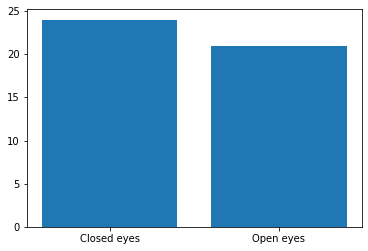

In [ ]:
keys = count.keys()
values = count.values()
plt.bar(keys, values)

In [ ]:
# Actual
count1 = {}
for text in dataf['State']:
  count1[text] = count1.get(text, 0) + 1
count1


{'Closed eyes': 21, 'Open eyes': 24}

<BarContainer object of 2 artists>

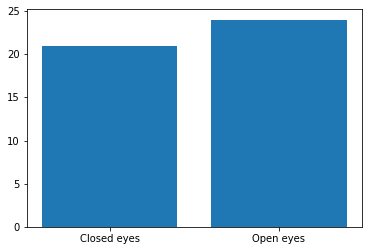

In [ ]:
# Actual state
keys1 = count1.keys()
values1 = count1.values()
plt.bar(keys1, values1)

## Calculating Accuracy

In [ ]:
for i in range(len(dataf['Predicted_State'])):
  if dataf['Predicted_State'][i] == dataf['State'][i]:
    num = num + 1
accuracy = num/len(dataf['Predicted_State'])
accuracy

0.8888888888888888